# 주제 : 서울시 교통사고 분석

## 1. 데이터수집
+ http://taas.koroad.or.kr/web/shp/sbm/initUnityAnalsSys.do?menuId=WEB_KMP_OVT_UAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() #한글이 깨지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

#### 법규위반별 사고데이터 불러오기(2019년)

In [39]:
car_accident2=pd.read_excel("C:/Users/user/Desktop/교통사고 데이터/서울시법규위반별사고데이터.xls",encoding="euc-kr", thousands=".",header=1)
car_accident2.head()

,시도,시군구,사고년도,합계,합계.1,과로,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,...,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,철길건널목 통과방법위반,긴급자동차에대한 피양의무 위반,기타(운전자법규위반),합계.2,정비불량 제차의 운전금지위반
0,서울,합계,사고건수,39258,39257,-,102,20,17,1074,...,21842,1325,1515,701,774,-,-,1409,1,1
1,서울,합계,사망자수,250,250,-,23,0,0,12,...,147,0,13,1,2,-,-,4,0,0
2,서울,합계,부상자수,53904,53900,-,159,27,22,1609,...,28990,1868,1589,1085,1109,-,-,1577,4,4
3,서울,종로구,사고건수,1133,1133,-,-,1,1,24,...,613,45,40,16,9,-,-,39,-,-
4,서울,종로구,사망자수,6,6,-,-,0,0,0,...,6,0,0,0,0,-,-,0,-,-


#### 법규위반별 사고데이터 전처리

In [40]:
# 결측치 -를 0으로 변환
car_accident2.replace("-",0,inplace=True)

In [41]:
# 하위 5개 열을 기타위반으로 만들기
car_accident2.head(1)
car_accident2["기타위반"] = car_accident2["과로"]+car_accident2["철길건널목 통과방법위반"]+car_accident2["긴급자동차에대한 피양의무 위반"]+car_accident2["통행우선 순위위반"]+car_accident2["정비불량 제차의 운전금지위반"]

In [42]:
# 필요없는 변수 제거
del car_accident2["과로"]
del car_accident2["철길건널목 통과방법위반"]
del car_accident2["긴급자동차에대한 피양의무 위반"]
del car_accident2["통행우선 순위위반"]
del car_accident2["정비불량 제차의 운전금지위반"]
del car_accident2["합계.2"]
del car_accident2["합계.1"]
del car_accident2["시도"]

In [43]:
# 칼럼이름 변경
car_accident2.rename(columns={"사고년도" : "종류", "시군구": "구별"}, inplace = True)

In [44]:
car_accident2.head()

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
0,합계,사고건수,39258,102,20,17,1074,4898,5259,43,267,7,21842,1325,1515,701,774,1409,5
1,합계,사망자수,250,23,0,0,12,38,7,0,3,0,147,0,13,1,2,4,0
2,합계,부상자수,53904,159,27,22,1609,7411,8059,58,320,9,28990,1868,1589,1085,1109,1577,12
3,종로구,사고건수,1133,0,1,1,24,155,188,0,2,0,613,45,40,16,9,39,0
4,종로구,사망자수,6,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0


In [45]:
# 2. 서울시에서 어떤 위반이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
car_accident2.head(1) # 안전운전의무 불이행 사고건수가 가장 많음
car_accident2[1:2] # 안전운전의무 불이행 사망자수가 가장 많음

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
1,합계,사망자수,250,23,0,0,12,38,7,0,3,0,147,0,13,1,2,4,0


In [46]:
# 전체 합 행 지우고 새로운 데이터명 할당
ncar_accident2 = car_accident2[:]
ncar_accident2.drop([0],inplace=True)
ncar_accident2.drop([1],inplace=True)
ncar_accident2.drop([2],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
ncar_accident2

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
3,종로구,사고건수,1133,0,1,1,24,155,188,0,2,0,613,45,40,16,9,39,0
4,종로구,사망자수,6,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0
5,종로구,부상자수,1559,0,1,3,42,252,268,0,2,0,795,66,40,30,13,47,0
6,중구,사고건수,1184,4,0,0,28,174,279,0,3,0,576,29,41,3,7,40,0
7,중구,사망자수,5,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,강북구,사망자수,7,0,0,0,1,2,0,0,1,0,3,0,0,0,0,0,0
74,강북구,부상자수,1706,4,1,1,71,208,196,2,8,1,942,55,53,10,88,66,0
75,금천구,사고건수,920,2,0,0,32,133,102,1,2,0,547,6,39,10,8,38,0
76,금천구,사망자수,9,0,0,0,1,2,0,0,0,0,4,0,2,0,0,0,0


In [48]:
# 종류별로 데이터 분리
# 사고건수만 모아서 저장하기
is_count = ncar_accident2['종류'] == '사고건수'
ncar_accident21=ncar_accident2[is_count]

del ncar_accident21["종류"]
#사망자수만 모아서 저장하기
is_dead = ncar_accident2['종류'] == '사망자수'
ncar_accident22=ncar_accident2[is_dead]
del ncar_accident22["종류"]

#부상자수만 모아서 저장하기
is_sick = ncar_accident2['종류'] == '부상자수'
ncar_accident23=ncar_accident2[is_sick]
del ncar_accident23["종류"]

In [49]:
# 구별 컬럼을 인덱스로 변경
ncar_accident21.set_index("구별", inplace=True)
ncar_accident22.set_index("구별", inplace=True)
ncar_accident23.set_index("구별", inplace=True)

In [50]:
# 사고건수 대비 사망자수를 위한 새로운 데이터 
ncar_accident24 = ncar_accident23[:]

In [51]:
#  사고건수 대비 사망자수 구하기
ncar_accident24["과속비율"] = ncar_accident22["과속"]/ ncar_accident21["과속"]
ncar_accident24["앞지르기 방법위반비율"] = ncar_accident22["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
ncar_accident24["앞지르기 금지위반비율"] = ncar_accident22["앞지르기 금지위반"]/ ncar_accident21["앞지르기 금지위반"]
ncar_accident24["중앙선 침범비율"] = ncar_accident22["중앙선 침범"]/ ncar_accident21["중앙선 침범"]
ncar_accident24["신호위반비율"] = ncar_accident22["신호위반"]/ ncar_accident21["신호위반"]
ncar_accident24["안전거리 미확보비율"] = ncar_accident22["안전거리 미확보"]/ ncar_accident21["안전거리 미확보"]
ncar_accident24["서행 및 일시정지위반비율"] = ncar_accident22["서행 및 일시정지위반"]/ ncar_accident21["서행 및 일시정지위반"]
ncar_accident24["부당한 회전비율"] = ncar_accident22["부당한 회전"]/ ncar_accident21["부당한 회전"]
ncar_accident24["진로양보 의무 불이행비율"] = ncar_accident22["진로양보 의무 불이행"]/ ncar_accident21["진로양보 의무 불이행"]
ncar_accident24["안전운전 의무 불이행비율"] = ncar_accident22["안전운전 의무 불이행"]/ ncar_accident21["안전운전 의무 불이행"]
ncar_accident24["교차로 통행방법 위반비율"] = ncar_accident22["교차로 통행방법 위반"]/ ncar_accident21["교차로 통행방법 위반"]
ncar_accident24["보행자 보호의무 위반비율"] = ncar_accident22["보행자 보호의무 위반"]/ ncar_accident21["보행자 보호의무 위반"]
ncar_accident24["차로위반(진로변경 위반)비율"] = ncar_accident22["차로위반(진로변경 위반)"]/ ncar_accident21["차로위반(진로변경 위반)"]
ncar_accident24["직진 및 우회전차의 통행방해비율"] = ncar_accident22["직진 및 우회전차의 통행방해"]/ ncar_accident21["직진 및 우회전차의 통행방해"]
ncar_accident24["기타(운전자법규위반)비율"] = ncar_accident22["기타(운전자법규위반)"]/ ncar_accident21["기타(운전자법규위반)"]
ncar_accident24["기타위반비율"] = ncar_accident22["기타위반"]/ ncar_accident21["기타위반"]

<ipython-input-51-2a24f75be28d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident24["과속비율"] = ncar_accident22["과속"]/ ncar_accident21["과속"]
<ipython-input-51-2a24f75be28d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident24["앞지르기 방법위반비율"] = ncar_accident22["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
<ipython-input-51-2a24f75be28d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [52]:
# 0/0으로 인한 NaN발생. NaN을 0으로 대체
ncar_accident24.fillna(0,inplace=True)
ncar_accident24

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,...,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율
구별,,,,,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,...,0.0,0.000000,0.0,0.009788,0.0,0.000000,0.000000,0.000000,0.000000,0.0
중구,1615,8,0,0,49,260,422,0,4,0,...,0.0,0.000000,0.0,0.006944,0.0,0.000000,0.000000,0.000000,0.000000,0.0
용산구,1614,8,2,1,67,176,301,0,5,0,...,0.0,0.000000,0.0,0.010386,0.0,0.000000,0.000000,0.000000,0.033333,0.0
성동구,1439,4,0,0,30,202,272,0,8,0,...,0.0,0.000000,0.0,0.015280,0.0,0.031250,0.000000,0.038462,0.000000,0.0
동대문구,1988,3,0,2,60,286,322,2,15,1,...,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.000000,0.000000,0.000000,0.0
성북구,2007,3,3,1,58,304,337,0,2,0,...,0.0,0.000000,0.0,0.007772,0.0,0.029851,0.000000,0.000000,0.000000,0.0
도봉구,1163,8,1,0,36,232,108,0,7,0,...,0.0,0.000000,0.0,0.008989,0.0,0.000000,0.000000,0.000000,0.000000,0.0
은평구,1464,0,4,2,55,286,96,1,10,0,...,0.0,0.000000,0.0,0.003140,0.0,0.019608,0.047619,0.066667,0.000000,0.0
서대문구,1609,1,0,1,60,337,143,0,11,0,...,0.0,0.000000,0.0,0.019847,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [53]:
# 필요없는 변수 제거
del ncar_accident24["과속"]
del ncar_accident24["앞지르기 방법위반"]
del ncar_accident24["앞지르기 금지위반"]
del ncar_accident24["중앙선 침범"]
del ncar_accident24["신호위반"]
del ncar_accident24["안전거리 미확보"]
del ncar_accident24["서행 및 일시정지위반"]
del ncar_accident24["부당한 회전"]
del ncar_accident24["진로양보 의무 불이행"]
del ncar_accident24["안전운전 의무 불이행"]
del ncar_accident24["교차로 통행방법 위반"]
del ncar_accident24["보행자 보호의무 위반"]
del ncar_accident24["차로위반(진로변경 위반)"]
del ncar_accident24["직진 및 우회전차의 통행방해"]
del ncar_accident24["기타(운전자법규위반)"]
del ncar_accident24["기타위반"]
del ncar_accident24["합계"]


In [54]:
#ncar_accident21.head()
#ncar_accident22.head()
ncar_accident23.head()

,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
구별,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,795,66,40,30,13,47,0
중구,1615,8,0,0,49,260,422,0,4,0,737,37,44,5,8,41,0
용산구,1614,8,2,1,67,176,301,0,5,0,909,30,47,28,9,31,0
성동구,1439,4,0,0,30,202,272,0,8,0,745,60,32,24,35,27,0
동대문구,1988,3,0,2,60,286,322,2,15,1,1008,52,57,27,87,61,5


In [55]:
# 사고건수 대비 사망자비율
ncar_accident24.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율
구별,,,,,,,,,,,,,,,,
종로구,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.009788,0.0,0.00000,0.0,0.000000,0.000000,0.0
중구,0.000000,0.0,0.0,0.000000,0.005747,0.00000,0.0,0.0,0.0,0.006944,0.0,0.00000,0.0,0.000000,0.000000,0.0
용산구,0.166667,0.0,0.0,0.000000,0.000000,0.00463,0.0,0.0,0.0,0.010386,0.0,0.00000,0.0,0.000000,0.033333,0.0
성동구,0.000000,0.0,0.0,0.000000,0.013072,0.00000,0.0,0.0,0.0,0.015280,0.0,0.03125,0.0,0.038462,0.000000,0.0
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.00000,0.0,0.0,0.0,0.009780,0.0,0.00000,0.0,0.000000,0.000000,0.0


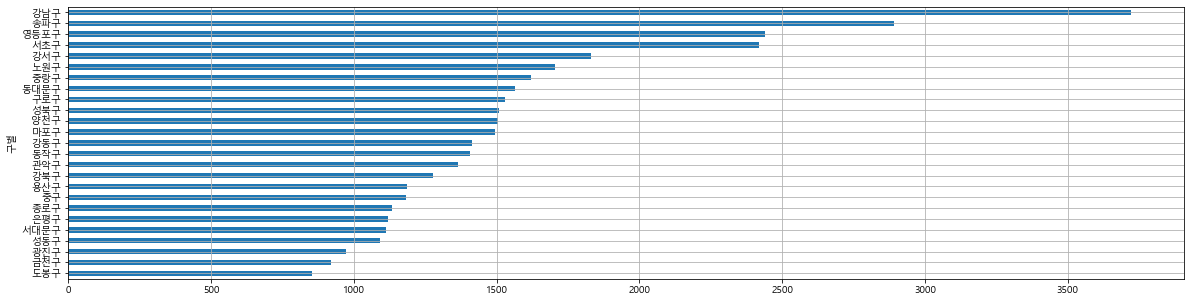

In [20]:
# 4.구별 사고건수 그래프 그리기

ncar_accident21.sort_values(by="합계",ascending=False).head()
# 사고건수가 높은 강남구, 송파구, 영등포구, 서초구, 강서구

ncar_accident21["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

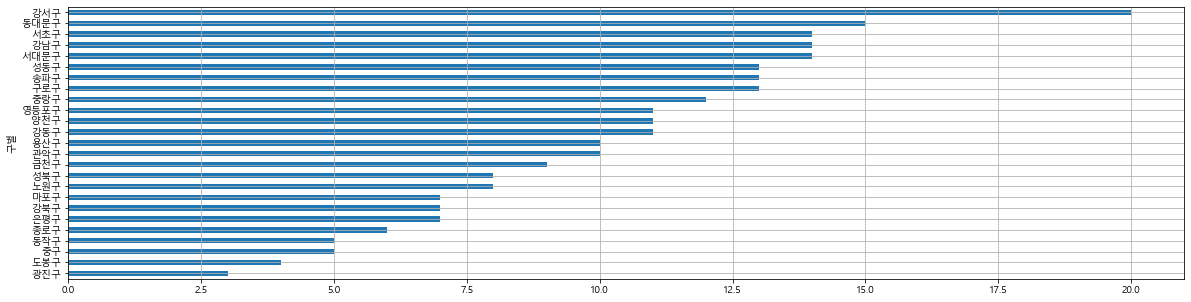

In [21]:
# 4.구별 사망자수 그래프 그리기

ncar_accident22.sort_values(by="합계",ascending=False).head()
# 사망자수가 높은 강서구, 동대문구, 서초구, 서대문구, 강남구

ncar_accident22["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

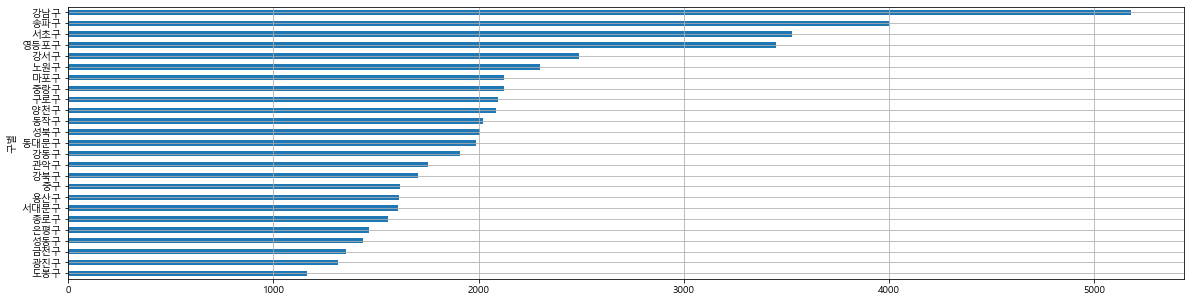

In [22]:
# 4.구별 부상자수 그래프 그리기
ncar_accident23["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

In [23]:
# 사고건수는 강남구가 가장 높은데 사망자수는 강서구가 가장 높다????

In [24]:
ncol2=["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]
ncar_accident24["사망자수비율"]=np.sum(ncar_accident24[ncol2],axis=1)
ncar_accident24


,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,사망자수비율
구별,,,,,,,,,,,,,,,,,
종로구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.009788,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.009788
중구,0.000000,0.0,0.0,0.000000,0.005747,0.000000,0.0,0.000000,0.0,0.006944,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.012692
용산구,0.166667,0.0,0.0,0.000000,0.000000,0.004630,0.0,0.000000,0.0,0.010386,0.0,0.000000,0.000000,0.000000,0.033333,0.0,0.215015
성동구,0.000000,0.0,0.0,0.000000,0.013072,0.000000,0.0,0.000000,0.0,0.015280,0.0,0.031250,0.000000,0.038462,0.000000,0.0,0.098064
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.000000,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.550960
성북구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007772,0.0,0.029851,0.000000,0.000000,0.000000,0.0,0.037623
도봉구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.008989,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.008989
은평구,0.000000,0.0,0.0,0.000000,0.011299,0.000000,0.0,0.000000,0.0,0.003140,0.0,0.019608,0.047619,0.066667,0.000000,0.0,0.148333
서대문구,0.000000,0.0,0.0,0.000000,0.000000,0.010870,0.0,0.000000,0.0,0.019847,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.030717


In [25]:
ncar_accident24_sort = ncar_accident24.sort_values(by='사망자수비율', ascending=False)
ncar_accident24_sort.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,사망자수비율
구별,,,,,,,,,,,,,,,,,
양천구,1.000000,0.0,0.0,0.037037,0.012346,0.000000,0.0,0.000000,0.0,0.004494,0.0,0.029851,0.0,0.0,0.000000,0.0,1.083728
강동구,0.750000,0.0,0.0,0.030303,0.018293,0.000000,0.0,0.071429,0.0,0.001230,0.0,0.012500,0.0,0.0,0.015385,0.0,0.899139
구로구,0.750000,0.0,0.0,0.000000,0.012295,0.012048,0.0,0.000000,0.0,0.003501,0.0,0.015385,0.0,0.0,0.016949,0.0,0.810178
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.000000,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.0,0.0,0.000000,0.0,0.550960
강서구,0.428571,0.0,0.0,0.000000,0.015936,0.011173,0.0,0.000000,0.0,0.009251,0.0,0.000000,0.0,0.0,0.023256,0.0,0.488187


Text(0.5, 1.0, '법규 위반 비율(정규화된 사망자수비율의 합으로 정렬)')

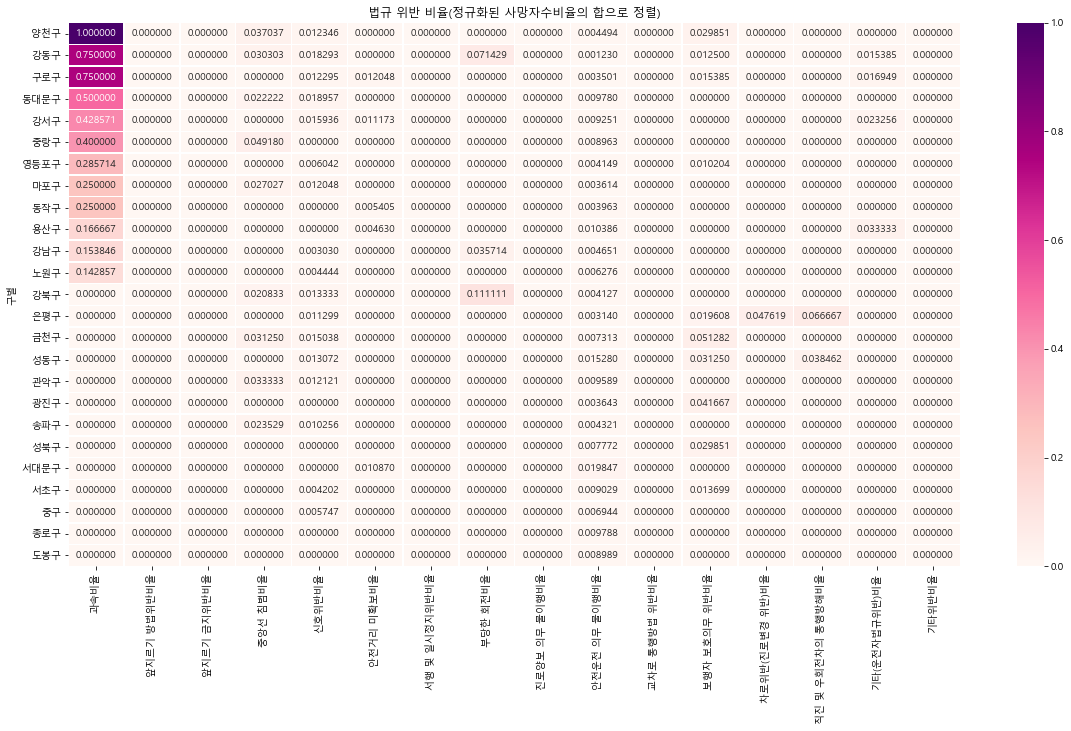

In [26]:
#히트맵
plt.figure(figsize=(20,10))
sns.heatmap(ncar_accident24_sort[["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('법규 위반 비율(정규화된 사망자수비율의 합으로 정렬)')

In [28]:
# 사고건수 대비 부상자수를 위한 새로운 데이터 
ncar_accident25 = ncar_accident23[:]
ncar_accident25

,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
구별,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,795,66,40,30,13,47,0
중구,1615,8,0,0,49,260,422,0,4,0,737,37,44,5,8,41,0
용산구,1614,8,2,1,67,176,301,0,5,0,909,30,47,28,9,31,0
성동구,1439,4,0,0,30,202,272,0,8,0,745,60,32,24,35,27,0
동대문구,1988,3,0,2,60,286,322,2,15,1,1008,52,57,27,87,61,5
성북구,2007,3,3,1,58,304,337,0,2,0,1005,66,67,34,50,76,1
도봉구,1163,8,1,0,36,232,108,0,7,0,576,23,43,11,81,37,0
은평구,1464,0,4,2,55,286,96,1,10,0,779,57,52,26,27,69,0
서대문구,1609,1,0,1,60,337,143,0,11,0,837,64,63,16,26,50,0


In [29]:
ncar_accident25["과속비율"] = ncar_accident23["과속"]/ ncar_accident21["과속"]
ncar_accident25["앞지르기 방법위반비율"] = ncar_accident23["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
ncar_accident25["앞지르기 금지위반비율"] = ncar_accident23["앞지르기 금지위반"]/ ncar_accident21["앞지르기 금지위반"]
ncar_accident25["중앙선 침범비율"] = ncar_accident23["중앙선 침범"]/ ncar_accident21["중앙선 침범"]
ncar_accident25["신호위반비율"] = ncar_accident23["신호위반"]/ ncar_accident21["신호위반"]
ncar_accident25["안전거리 미확보비율"] = ncar_accident23["안전거리 미확보"]/ ncar_accident21["안전거리 미확보"]
ncar_accident25["서행 및 일시정지위반비율"] = ncar_accident23["서행 및 일시정지위반"]/ ncar_accident21["서행 및 일시정지위반"]
ncar_accident25["부당한 회전비율"] = ncar_accident23["부당한 회전"]/ ncar_accident21["부당한 회전"]
ncar_accident25["진로양보 의무 불이행비율"] = ncar_accident23["진로양보 의무 불이행"]/ ncar_accident21["진로양보 의무 불이행"]
ncar_accident25["안전운전 의무 불이행비율"] = ncar_accident23["안전운전 의무 불이행"]/ ncar_accident21["안전운전 의무 불이행"]
ncar_accident25["교차로 통행방법 위반비율"] = ncar_accident23["교차로 통행방법 위반"]/ ncar_accident21["교차로 통행방법 위반"]
ncar_accident25["보행자 보호의무 위반비율"] = ncar_accident23["보행자 보호의무 위반"]/ ncar_accident21["보행자 보호의무 위반"]
ncar_accident25["차로위반(진로변경 위반)비율"] = ncar_accident23["차로위반(진로변경 위반)"]/ ncar_accident21["차로위반(진로변경 위반)"]
ncar_accident25["직진 및 우회전차의 통행방해비율"] = ncar_accident23["직진 및 우회전차의 통행방해"]/ ncar_accident21["직진 및 우회전차의 통행방해"]
ncar_accident25["기타(운전자법규위반)비율"] = ncar_accident23["기타(운전자법규위반)"]/ ncar_accident21["기타(운전자법규위반)"]
ncar_accident25["기타위반비율"] = ncar_accident23["기타위반"]/ ncar_accident21["기타위반"]

<ipython-input-29-62d48bf40641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident25["과속비율"] = ncar_accident23["과속"]/ ncar_accident21["과속"]
<ipython-input-29-62d48bf40641>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident25["앞지르기 방법위반비율"] = ncar_accident23["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
<ipython-input-29-62d48bf40641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [31]:
# 0/0으로 인한 NaN발생. NaN을 0으로 대체
ncar_accident25.fillna(0,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,...,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율
구별,,,,,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,...,0.000000,1.000000,0.0,1.296900,1.466667,1.000000,1.875000,1.444444,1.205128,0.0
중구,1615,8,0,0,49,260,422,0,4,0,...,0.000000,1.333333,0.0,1.279514,1.275862,1.073171,1.666667,1.142857,1.025000,0.0
용산구,1614,8,2,1,67,176,301,0,5,0,...,0.000000,1.000000,0.0,1.348665,1.200000,1.146341,1.400000,1.285714,1.033333,0.0
성동구,1439,4,0,0,30,202,272,0,8,0,...,0.000000,1.142857,0.0,1.264856,1.200000,1.000000,1.500000,1.346154,1.080000,0.0
동대문구,1988,3,0,2,60,286,322,2,15,1,...,1.000000,1.071429,1.0,1.232274,1.368421,1.036364,1.080000,1.279412,1.129630,2.5
성북구,2007,3,3,1,58,304,337,0,2,0,...,0.000000,1.000000,0.0,1.301813,1.466667,1.000000,1.619048,1.315789,1.070423,1.0
도봉구,1163,8,1,0,36,232,108,0,7,0,...,0.000000,1.000000,0.0,1.294382,1.352941,1.023810,1.571429,1.500000,1.480000,0.0
은평구,1464,0,4,2,55,286,96,1,10,0,...,1.000000,1.111111,0.0,1.222920,1.500000,1.019608,1.238095,1.800000,1.061538,0.0
서대문구,1609,1,0,1,60,337,143,0,11,0,...,0.000000,1.375000,0.0,1.277863,1.560976,1.050000,1.777778,1.529412,1.086957,0.0


In [32]:
# 필요없는 변수 제거
del ncar_accident25["과속"]
del ncar_accident25["앞지르기 방법위반"]
del ncar_accident25["앞지르기 금지위반"]
del ncar_accident25["중앙선 침범"]
del ncar_accident25["신호위반"]
del ncar_accident25["안전거리 미확보"]
del ncar_accident25["서행 및 일시정지위반"]
del ncar_accident25["부당한 회전"]
del ncar_accident25["진로양보 의무 불이행"]
del ncar_accident25["안전운전 의무 불이행"]
del ncar_accident25["교차로 통행방법 위반"]
del ncar_accident25["보행자 보호의무 위반"]
del ncar_accident25["차로위반(진로변경 위반)"]
del ncar_accident25["직진 및 우회전차의 통행방해"]
del ncar_accident25["기타(운전자법규위반)"]
del ncar_accident25["기타위반"]
del ncar_accident25["합계"]

In [38]:
#사고건수 대비 부상자수 비율
ncar_accident25.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,부상자수비율
구별,,,,,,,,,,,,,,,,,
종로구,0.000000,1.0,3.0,1.750000,1.625806,1.425532,0.0,1.000000,0.0,1.296900,1.466667,1.000000,1.875000,1.444444,1.205128,0.0,18.089478
중구,2.000000,0.0,0.0,1.750000,1.494253,1.512545,0.0,1.333333,0.0,1.279514,1.275862,1.073171,1.666667,1.142857,1.025000,0.0,15.553202
용산구,1.333333,2.0,1.0,1.488889,1.517241,1.393519,0.0,1.000000,0.0,1.348665,1.200000,1.146341,1.400000,1.285714,1.033333,0.0,17.147036
성동구,2.000000,0.0,0.0,1.250000,1.320261,1.628743,0.0,1.142857,0.0,1.264856,1.200000,1.000000,1.500000,1.346154,1.080000,0.0,14.732871
동대문구,0.750000,0.0,1.0,1.333333,1.355450,1.424779,1.0,1.071429,1.0,1.232274,1.368421,1.036364,1.080000,1.279412,1.129630,2.5,18.561091


In [37]:
ncol2=["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]
ncar_accident25["부상자수비율"]=np.sum(ncar_accident25[ncol2],axis=1)
ncar_accident25.head()


,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,부상자수비율
구별,,,,,,,,,,,,,,,,,
종로구,0.000000,1.0,3.0,1.750000,1.625806,1.425532,0.0,1.000000,0.0,1.296900,1.466667,1.000000,1.875000,1.444444,1.205128,0.0,18.089478
중구,2.000000,0.0,0.0,1.750000,1.494253,1.512545,0.0,1.333333,0.0,1.279514,1.275862,1.073171,1.666667,1.142857,1.025000,0.0,15.553202
용산구,1.333333,2.0,1.0,1.488889,1.517241,1.393519,0.0,1.000000,0.0,1.348665,1.200000,1.146341,1.400000,1.285714,1.033333,0.0,17.147036
성동구,2.000000,0.0,0.0,1.250000,1.320261,1.628743,0.0,1.142857,0.0,1.264856,1.200000,1.000000,1.500000,1.346154,1.080000,0.0,14.732871
동대문구,0.750000,0.0,1.0,1.333333,1.355450,1.424779,1.0,1.071429,1.0,1.232274,1.368421,1.036364,1.080000,1.279412,1.129630,2.5,18.561091


In [35]:
ncar_accident25_sort = ncar_accident25.sort_values(by='부상자수비율', ascending=False)
ncar_accident25_sort.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,부상자수비율
구별,,,,,,,,,,,,,,,,,
광진구,7.000000,2.0,0.0,1.562500,1.477876,1.431373,1.25,1.750000,0.0,1.309654,1.406250,1.041667,1.500000,1.222222,1.028571,0.0,23.980113
영등포구,1.285714,1.0,2.0,1.722222,1.498489,1.505119,0.00,1.250000,3.0,1.388658,1.523810,1.081633,1.658537,1.437500,1.150000,2.0,23.501683
서초구,2.363636,0.0,0.0,1.642857,1.596639,1.680653,1.20,1.294118,1.0,1.361174,1.484848,1.013699,1.780488,1.533333,1.261538,4.0,23.212983
강북구,4.000000,1.0,1.0,1.479167,1.386667,1.593496,1.00,0.888889,1.0,1.295736,1.617647,1.060000,2.500000,1.375000,1.064516,0.0,22.261117
금천구,1.500000,0.0,0.0,1.656250,1.601504,1.539216,2.00,2.000000,0.0,1.435101,2.166667,1.025641,3.400000,1.375000,1.000000,0.0,20.699378


Text(0.5, 1.0, '법규 위반 비율(정규화된 부상자수비율의 합으로 정렬)')

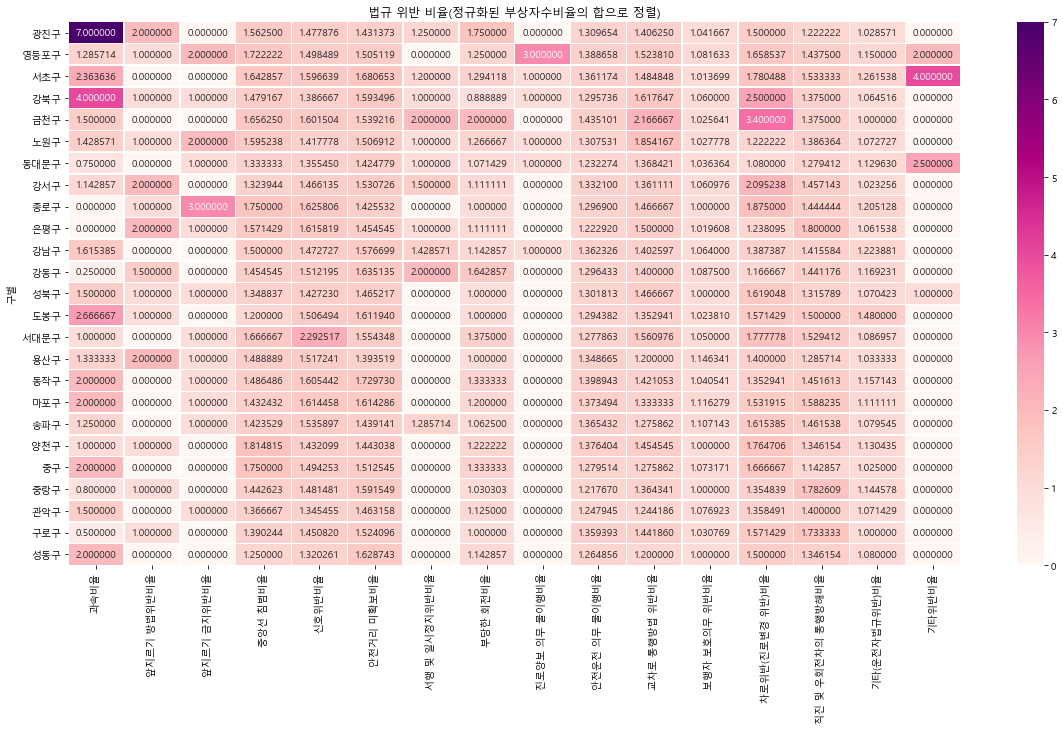

In [36]:
#히트맵
plt.figure(figsize=(20,10))
sns.heatmap(ncar_accident25_sort[["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('법규 위반 비율(정규화된 부상자수비율의 합으로 정렬)')